In [1]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape #60000 is total count , 28,28 is rows and columns. 

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
#(28,28,1) going to flatten
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [5]:
x_train = x_train.astype('float32')  # Convert to float32
x_test = x_test.astype('float32')    # Convert to float32

In [6]:
#Normalize the shape
#/= meaning is x_train=x_train/255
#Dividing by 255 is a common preprocessing step when working with image data to ensure that the pixel values are normalized
#between 0 and 1. This normalization helps improve the training efficiency and stability of machine learning algorithms, 
#especially neural networks, when processing images
x_train /= 255
x_test /= 255

In [7]:
#Brain creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
from keras.losses import sparse_categorical_crossentropy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 47s 24ms/step - loss: 0.2080 - accuracy: 0.9385
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0829 - accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0560 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0410 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0350 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0275 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0236 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0208 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0197 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [9]:
model.evaluate(x_test,y_test)# [0.0650666356086731, 0.9839000105857849][loss,accuracy]

313/313 [==============================] - 2s 4ms/step - loss: 0.0651 - accuracy: 0.9839


[0.0650666356086731, 0.9839000105857849]

In [10]:
#Predicting the label fashion
import numpy as np
y_predict=model.predict(x_test)
y_predict=np.argmax(y_predict,axis=1)
#y_test=np.argmax(y_test,axis=1)

313/313 [==============================] - 1s 4ms/step


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#Overall accuracy is 98%

1/1 [==============================] - 0s 28ms/step
6


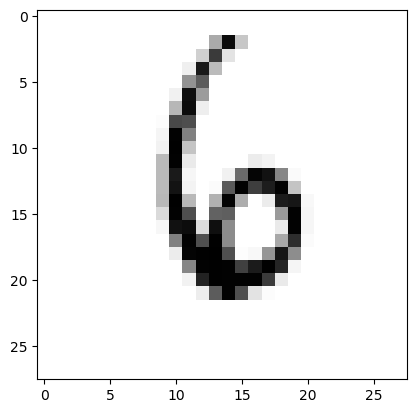

In [12]:
import matplotlib.pyplot as plt
image_index=6900
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
predict=x_test[image_index].reshape(28,28)
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())